### Import Libraries

In [ ]:
from PIL import Image
import os
import time
import argparse

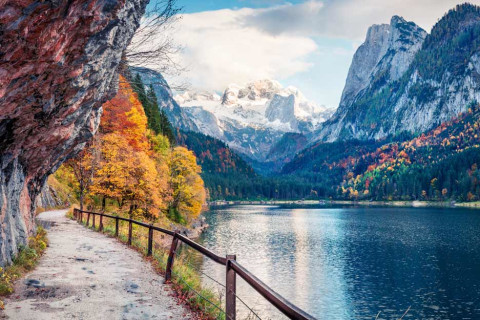

In [ ]:
image = Image.open("/content/drive/MyDrive/nature-image-for-website.jpg")
#image = Image.open(r"/content/drive/MyDrive/1 primary.jpg.crdownload")
image

## Extract color using KMean Clustering
If you want to extract more specific color, you can control with k value.

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

startTime = time.time()

# convert image a color array
image_array = np.array(image)
print('Original image shape',image_array.shape)

# reshape the array 
image_array=np.reshape(image_array,(-1, 3))
print('Reshape image shape',image_array.shape)

# fit k-means model with 4 clusters
model = KMeans(n_clusters=4)
model.fit(image_array)

endTime = time.time()
print('fitting model time: ', endTime - startTime)

Original image shape (320, 480, 3)
Reshape image shape (153600, 3)
fitting model time:  2.595879554748535


[39.09302559 65.32654152 87.77094328]
[213.75588108 212.58996007 212.21422043]
[126.68807688 149.22822968 167.81014277]
[156.93708823 116.02135814  78.02730052]


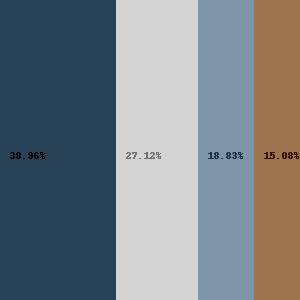

In [ ]:
from PIL import ImageDraw

# create a histogram of the number of clusters
numLabels = np.arange(0, len(np.unique(model.labels_)) + 1)
(hist, _) = np.histogram(model.labels_, bins = numLabels)

# normalize the histogram, such that it sums to one
hist = hist.astype("float")
hist /= hist.sum()

startX = 0

# create a histogram image that displays the most used colors
im = Image.new('RGB', (300, 300), (0, 0, 0))
dr = ImageDraw.Draw(im)

for (percent, color) in sorted(zip(hist, model.cluster_centers_), key=lambda t: t[0], reverse=True):
    print(color)
    endX = startX + (float(percent) * 300)
    dr.rectangle([int(startX), 0, int(endX), 300], fill=tuple(map(int, color)))
    per=str(round(percent*100,2))+"%"
    dr.text((int(startX)+10,150),per,fill=(int(color[0]-100),int(color[1]-100), int(color[2]-100)),size=150)
    startX = endX

# print the histogram
im

## Reference link
https://pyimagesearch.com/2014/05/26/opencv-python-k-means-color-clustering/